In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/jobs_in_data.csv")
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [17]:
r,c=data.shape
print(f"In our dataset we have {r} rows and {c} columns")

In our dataset we have 9355 rows and 12 columns


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [19]:
from pandas import DataFrame as df

df(data["job_category"].unique())

,0
0,Data Engineering
1,Data Architecture and Modeling
2,Data Science and Research
3,Machine Learning and AI
4,Data Analysis
5,Leadership and Management
6,BI and Visualization
7,Data Quality and Operations
8,Data Management and Strategy
9,Cloud and Database


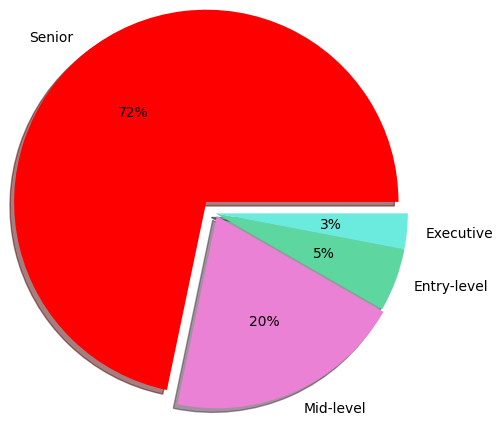

In [20]:
plt.pie(data["experience_level"].value_counts(),
        autopct="%0.0f%%",
        labels=["Senior","Mid-level","Entry-level","Executive"],
        explode=[.1,0.02,0,0],
        colors=["red","#eb81d5","#5ed6a0","#6aebde"],
        radius=1.3,
        shadow=True)
#plt.title("percentage of job offer")
plt.show()

In [21]:
data["experience_level"].value_counts()

Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: experience_level, dtype: int64

In [22]:
val=data.groupby("job_category")["salary"].sum().reset_index()

fig = px.bar(
    val,
    x='job_category',
    y='salary',
    color='job_category',

    width=1000,
    height=600
)
fig.show()


In [23]:
val=data.groupby(["work_year","employment_type"])["salary"].sum().reset_index()
df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.line(val, x='work_year',
              y='salary',
              color='employment_type',
              markers=True)
fig.show()

In [24]:
val=data.groupby(["work_year","experience_level"])["salary"].mean().reset_index()
val

,work_year,experience_level,salary
0,2020,Entry-level,82460.000000
1,2020,Executive,177500.000000
2,2020,Mid-level,91910.655172
3,2020,Senior,141844.444444
4,2021,Entry-level,73008.600000
5,2021,Executive,178500.000000
6,2021,Mid-level,97032.756410
7,2021,Senior,134168.405797
8,2022,Entry-level,81717.500000
9,2022,Executive,194226.875000


In [25]:
val=data.groupby(["work_year","experience_level"])["salary"].mean().reset_index()


df = px.data.gapminder().query("continent == 'Oceania'")

fig = px.line(val,
              x='work_year',
              y='salary',
              color='experience_level')
fig.show()

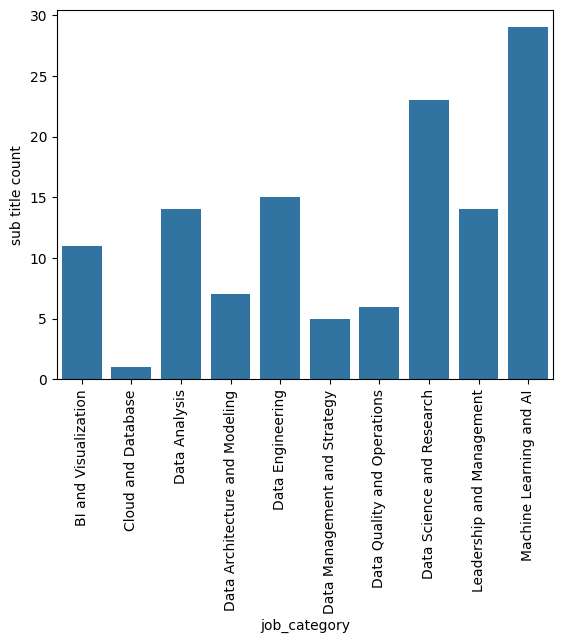

In [26]:
job=data.groupby("job_category")["job_title"].nunique().reset_index()
sns.barplot(data=job,x="job_category",y="job_title")
plt.xticks(rotation=90)
plt.ylabel("sub title count")
plt.show()

In [27]:
val= data.groupby("job_title")["job_title"].count().reset_index(name="count")
val

,job_title,count
0,AI Architect,12
1,AI Developer,18
2,AI Engineer,36
3,AI Programmer,5
4,AI Research Engineer,4
...,...,...
120,Sales Data Analyst,1
121,Software Data Engineer,3
122,Staff Data Analyst,3
123,Staff Data Scientist,2
